In [1]:
import mmpose
import torch
from mmcv.image import imread

from mmpose.apis import inference_topdown, init_model
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

from mmpose.apis import MMPoseInferencer
from mmpose.apis import visualize

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import json

import os
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Test MMPOSE

## Pose 2D

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
img_path = 'E:/pnw/raight.move/notebooks/testing_code/___noangel-1722900439655776891.jpg' 

In [7]:
inferencer = MMPoseInferencer('human')

11/28 14:52:25 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
11/28 14:52:25 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [8]:
# result_generator = inferencer(img_path, show=False,device=device,vis_out_dir='vis_results',return_vis=True,skeleton_style='openpose')
result_generator = inferencer(img_path, show=False,device=device,vis_out_dir='vis_results',return_vis=True)
result = next(result_generator)

11/28 14:52:29 - mmengine - INFO - the output image has been saved at vis_results\___noangel-1722900439655776891.jpg


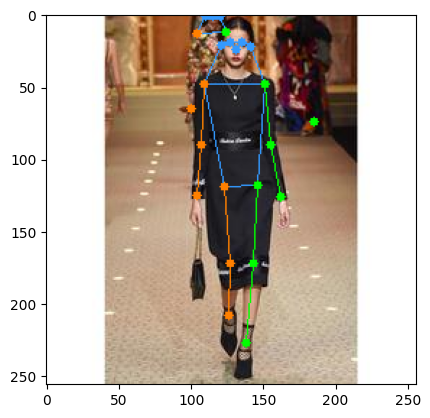

In [9]:
plt.imshow(result['visualization'][0])
plt.show()

In [10]:
len(result['predictions'][0][0]['keypoints'])

17

## Pose 3D

In [11]:
inferencer2 = MMPoseInferencer(pose3d='human3d')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [12]:
img_path = 'E:/pnw/raight.move/notebooks/testing_code/___noangel-1709914399961878688.jpg' 

In [13]:
result_generator2 = inferencer2(img_path, show=False,device=device,vis_out_dir='vis_results',return_vis=True)
result2 = next(result_generator2)

11/28 14:52:34 - mmengine - INFO - the output image has been saved at vis_results\___noangel-1709914399961878688.jpg


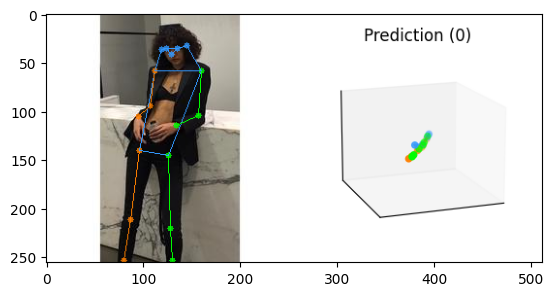

In [14]:
plt.imshow(result2['visualization'][0])
plt.show()

In [15]:
len(result2['predictions'][0][0]['keypoints'])

17

# Pose 2D - Funkcja

In [33]:
pose2d_weights = 'rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth'
det_weights = 'rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth'
path_images = 'E:/Influencer dataset/Post images (JPG files)/posts_image/image/'
path_results = 'E:/Influencer dataset/pose_estimation_2d/1_person/'
mapping_path = 'E:/pnw/raight.move/data/raw_1percent/photo_people_mappping_[0,5].txt'

In [5]:
def pose_estimation_2d(pose2d_weights,
                       det_weights,
                       path_images,
                       mapping_path,
                       path_results,
                       pose2d='human',
                       det_model='RTMDet-m'):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    df = pd.read_csv(mapping_path, header=None, sep='\t')

    list_images = df[df[1] == 1][0].to_list()

    inferencer = MMPoseInferencer(
            pose2d = pose2d,
            pose2d_weights = pose2d_weights,
            det_model = det_model,
            det_weights = det_weights
        )
    
    for filename in tqdm(list_images):

        img_path_ = os.path.join(path_images, filename)
        
        result_generator = inferencer(img_path_,
                                      show =False,
                                      device = device)
        
        result = next(result_generator)
    
        pred = dict(result)['predictions'][0]
    
        json_list = []
        for item in pred:
            item['bbox_score'] = float(item['bbox_score'])
            json_list.append(item)

        info_path = os.path.join(path_results,f"{filename.split('.')[0]}-pose_2d.info")
    
        with open(info_path, 'w') as json_file:
            json.dump(json_list, json_file, indent=2)

In [ ]:
pose_estimation_2d(pose2d_weights,
                       det_weights,
                       path_images,
                       mapping_path,
                       path_results,
                       pose2d='human',
                       det_model='RTMDet-m')

# Pose 3D - Funkcja

In [32]:
path_results_3d = 'E:/Influencer dataset/pose_estimation_3d/1_person/'

In [52]:
def pose_estimation_3d(path_images,
                       mapping_path,
                       path_results,
                       pose3d='human3d'):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    df = pd.read_csv(mapping_path, header=None, sep='\t')

    list_images = df[df[1] == 1][0].to_list()

    inferencer = MMPoseInferencer(pose3d=pose3d)
    
    for filename in tqdm(list_images):

        img_path_ = os.path.join(path_images, filename)
        
        result_generator = inferencer(img_path_,
                                      show =False,
                                      device = device)
        
        result = next(result_generator)
    
        pred = dict(result)['predictions'][0]

        info_path = os.path.join(path_results,f"{filename.split('.')[0]}-pose_3d.info")
    
        with open(info_path, 'w') as json_file:
            json.dump(pred, json_file, indent=2)

In [72]:
pose_estimation_3d(path_images,
                   mapping_path,
                   path_results_3d,
                   pose3d='human3d')

# Test na moich zdjęciach

In [16]:
img_path_1 = 'E:/pnw/raight.move/notebooks/testing_code/IMG_20231116_150006.jpg' 
img_path_2 = 'E:/pnw/raight.move/notebooks/testing_code/IMG_20231116_150012.jpg' 
img_path_3 = 'E:/pnw/raight.move/notebooks/testing_code/IMG_20231116_150017.jpg' 
img_path_4 = 'E:/pnw/raight.move/notebooks/testing_code/IMG_20231116_150024.jpg'

In [29]:
result_generator3 = inferencer2(img_path_4, show=False,device=device,vis_out_dir='vis_results',thickness=8)
result3 = next(result_generator3)

11/28 14:55:26 - mmengine - INFO - the output image has been saved at vis_results\IMG_20231116_150024.jpg


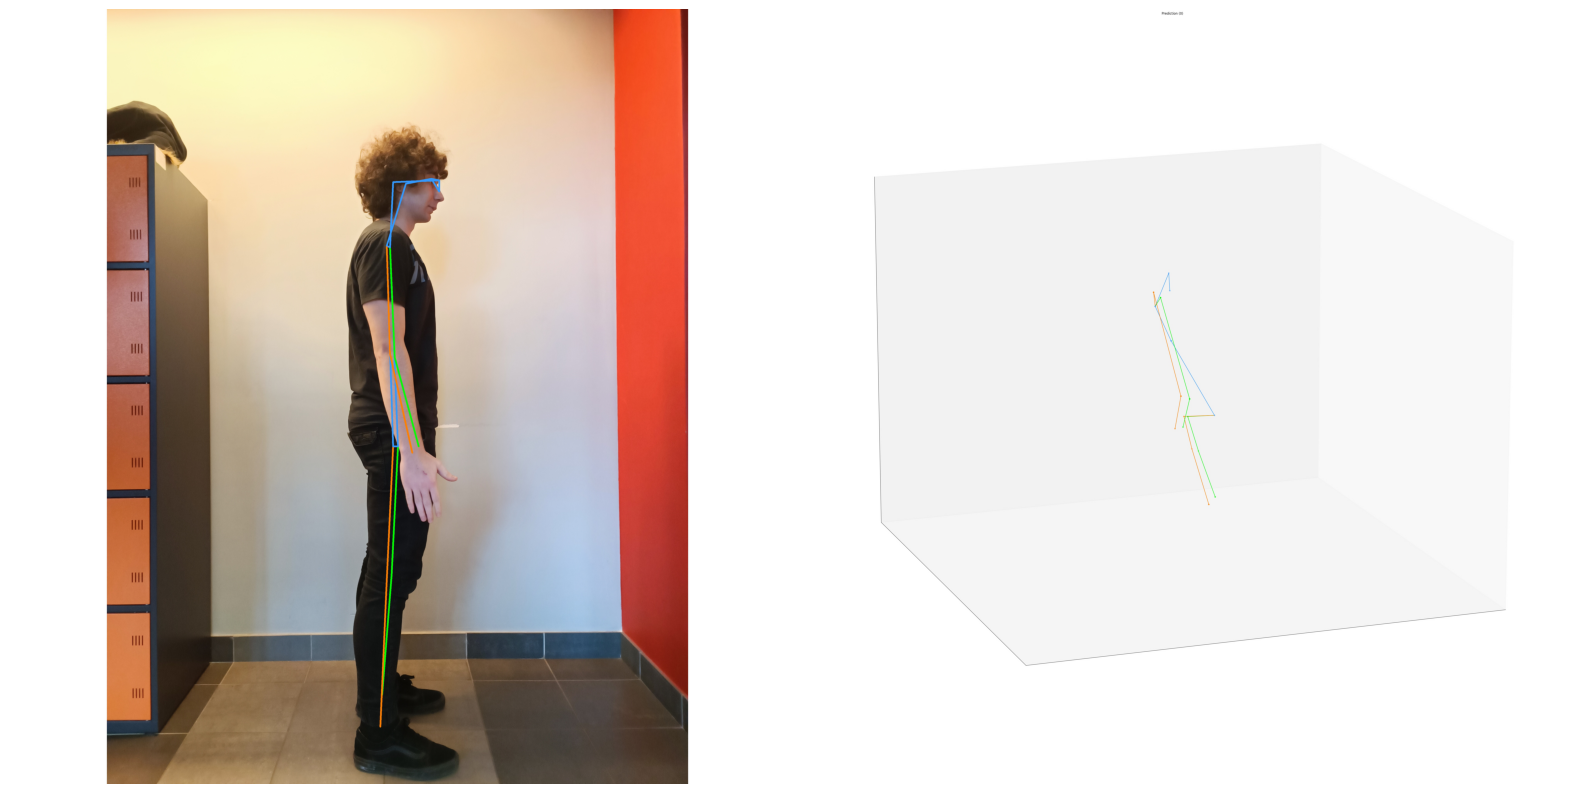

In [30]:
obraz = mpimg.imread('E:/pnw/raight.move/notebooks/testing_code/vis_results/IMG_20231116_150006.jpg' )

plt.figure(figsize=(20, 20))

plt.imshow(obraz)
plt.axis('off')
plt.show()

In [31]:
result3['predictions']

[[{'keypoints': [[-0.0, 0.0, 0.3892216682434082],
    [0.08837255835533142, -0.02755862846970558, 0.38728171586990356],
    [0.02895263582468033, -0.009664026089012623, 0.23890575766563416],
    [-0.04959326237440109, 0.0974782183766365, 0.010986328125],
    [0.11731396615505219, -0.016780266538262367, 0.38560253381729126],
    [0.10764355212450027, -0.00142134097404778, 0.2190302610397339],
    [0.12781982123851776, 0.10220984369516373, 0.0],
    [0.1371738314628601, -0.07622979581356049, 0.7533026933670044],
    [0.17438378930091858, -0.13138580322265625, 0.9162880778312683],
    [0.06842578202486038, -0.18907417356967926, 1.0419344902038574],
    [0.0700693354010582, -0.16448460519313812, 0.9696205854415894],
    [0.1625688523054123, -0.106702521443367, 0.9674057364463806],
    [0.11829198896884918, 0.023011134937405586, 0.4946298599243164],
    [0.1255219727754593, -0.013021079823374748, 0.33814990520477295],
    [0.18413525819778442, -0.12378223240375519, 0.9901796579360962],
    

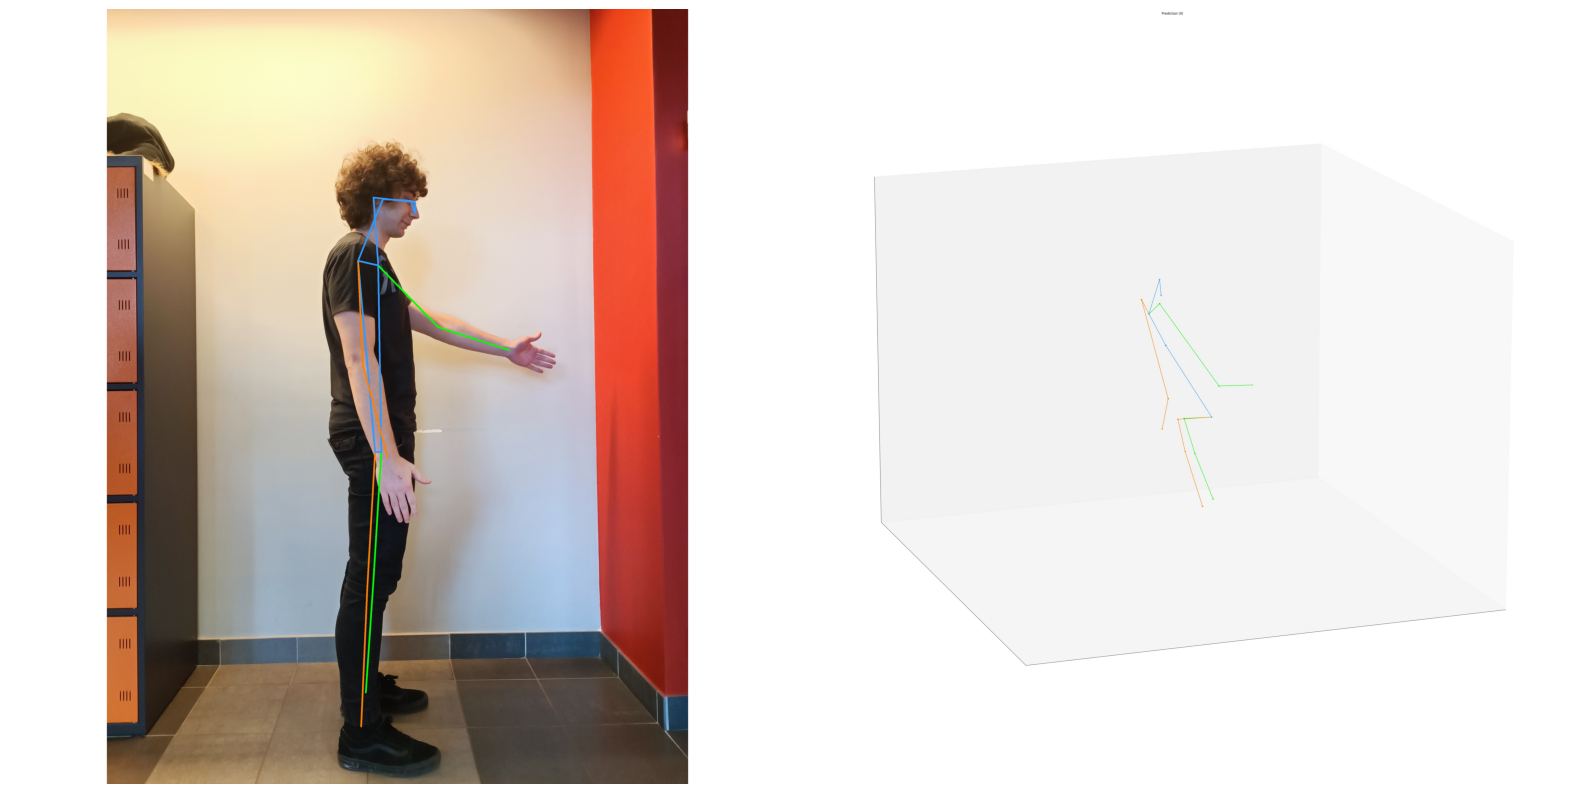

In [32]:
obraz = mpimg.imread('E:/pnw/raight.move/notebooks/testing_code/vis_results/IMG_20231116_150012.jpg' )

plt.figure(figsize=(20, 20))

plt.imshow(obraz)
plt.axis('off')
plt.show()

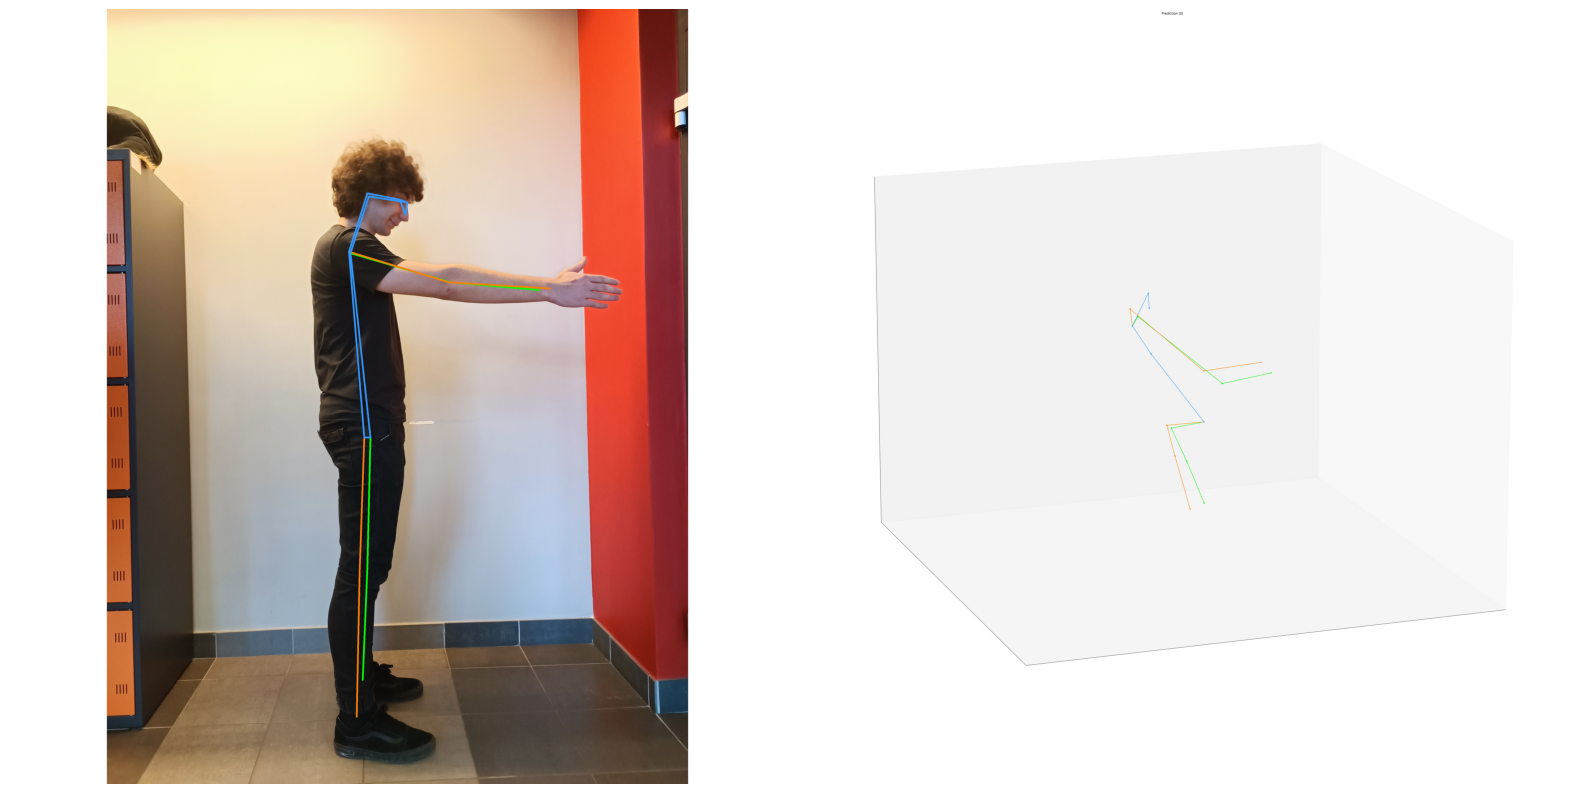

In [33]:
obraz = mpimg.imread('E:/pnw/raight.move/notebooks/testing_code/vis_results/IMG_20231116_150017.jpg' )

plt.figure(figsize=(20, 20))

plt.imshow(obraz)
plt.axis('off')
plt.show()

In [2]:
# Result